This notebook compares the results of the semantic diversity procedure of various implementations with measures reported by Hoffman et al. (2013). The procedure can be found in the notebooks named _SemanticDiversityProcedure_\__LSAbasedApproach_\__Replication_.

In [3]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install --user **

In [4]:
# Import used modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [5]:
# Set working directory 
wd = os.chdir("..")
#os.getcwd()

## Semantic Diversity Comparison

In [4]:
#Read in and preprocess semantic diversity values
#(U: unweighted, W: weighted by SVs)
#Inflected corpus (following Hoffman (2013)'s preprocessing) - P1 
diversity_P1_W = pd.read_csv("data/diversityResults_InflectedCorpus_svWeighted.csv", keep_default_na=False)
diversity_P1_W["Preprocessing"] = "C19_P1"
diversity_P1_W["LSAvectors"] = "SVsWeighted"
diversity_P1_U = pd.read_csv("data/diversityResults_InflectedCorpus_svUnweighted.csv", keep_default_na=False)
diversity_P1_U["Preprocessing"] = "C19_P1"
diversity_P1_U["LSAvectors"] = "SVsUnweighted"
diversityInfo = pd.concat([diversity_P1_U, diversity_P1_W])
#Lemmatized corpus - P2
diversity_P2_W = pd.read_csv("data/diversityResults_LemmatizedCorpus_svWeighted.csv", keep_default_na=False)
diversity_P2_W["Preprocessing"] = "C19_P2"
diversity_P2_W["LSAvectors"] = "SVsWeighted"
diversity_P2_U = pd.read_csv("data/diversityResults_LemmatizedCorpus_svUnweighted.csv", keep_default_na=False)
diversity_P2_U["Preprocessing"] = "C19_P2"
diversity_P2_U["LSAvectors"] = "SVsUnweighted"
diversityInfo = pd.concat([diversityInfo, diversity_P2_U, diversity_P2_W])
#From Hoffman et al., 2013
hoffmanSemD = pd.read_csv("", keep_default_na=False).iloc[:,0:7] #to add file name of data from Hoffman et al. (2013)
hoffmanSemD = hoffmanSemD[hoffmanSemD["!term"]!=""]
hoffmanSemD.rename(columns={'!term': 'Word', "BNC_wordcount": "WordCount", "BNC_contexts":"ContextCount"}, inplace=True)
hoffmanSemD = hoffmanSemD[["Word","SemD","ContextCount","WordCount"]]
hoffmanSemD["Preprocessing"] = "H13"
hoffmanSemD["LSAvectors"] = "?"
hoffmanSemD.rename(columns={}, inplace=True)
hoffmanSemD.reset_index(inplace=True,drop=True)
hoffmanSemD = hoffmanSemD.replace('', np.nan)
for col in ['SemD', "ContextCount", "WordCount"]:
    hoffmanSemD[col] = hoffmanSemD[col].astype(float)
diversityInfo = pd.concat([diversityInfo, hoffmanSemD])
diversityInfo.groupby(["Preprocessing", "LSAvectors"])["Word"].count()

Preprocessing  LSAvectors   
C19_P1         SVsUnweighted    38184
               SVsWeighted      38184
C19_P2         SVsUnweighted    28555
               SVsWeighted      28555
H13            ?                38544
Name: Word, dtype: int64

In [5]:
diversityInfo.groupby(["Preprocessing", "LSAvectors"])["SemD"].describe()

count      mean       std       min       25%  \
Preprocessing LSAvectors                                                       
C19_P1        SVsUnweighted  38184.0  1.367383  0.365062  0.019968  1.151229   
              SVsWeighted    38184.0  1.869707  0.404815  0.088800  1.629187   
C19_P2        SVsUnweighted  28555.0  1.351016  0.341458  0.065730  1.151034   
              SVsWeighted    28555.0  2.088861  0.416257  0.167261  1.855544   
H13           ?              38544.0  1.443427  0.395896  0.040000  1.200000   

                                  50%       75%       max  
Preprocessing LSAvectors                                   
C19_P1        SVsUnweighted  1.407914  1.624050  2.190713  
              SVsWeighted    1.891869  2.156098  2.932324  
C19_P2        SVsUnweighted  1.378830  1.584330  2.147651  
              SVsWeighted    2.109911  2.370337  3.195161  
H13           ?              1.490000  1.730000  2.413000

In [6]:
diversityInfo.groupby(["Preprocessing"])[["WordCount","ContextCount"]].describe()

WordCount                                                        \
                  count         mean           std   min    25%    50%    75%   
Preprocessing                                                                   
C19_P1          76368.0  2089.916352  40001.344958  50.0   98.0  204.0  607.0   
C19_P2          57110.0  1495.732096   6357.873781  50.0  105.0  221.0  672.0   
H13             38544.0  2108.240478  40535.211241  50.0   98.0  204.0  609.0   

                         ContextCount                                       \
                     max        count        mean          std   min   25%   
Preprocessing                                                                
C19_P1         5507778.0      76368.0  931.241620  3927.360937  40.0  75.0   
C19_P2          246798.0      57110.0  823.113815  2486.190312  40.0  74.0   
H13            5606279.0      38544.0  941.702262  4004.900541  40.0  75.0   

                                      
                 50%    75%      max  
Preprocessing                         
C19_P1         152.0  453.0  84551.0  
C19_P2         151.0  452.0  43025.0  
H13            153.0  456.0  87627.0

In [9]:
# Save data
#Long format
diversityInfo.to_csv("data/diversity_LongFormat.csv", index=False)
#Wide format
diversityInfo["Condition"] = diversityInfo["Preprocessing"]+" | "+ diversityInfo["LSAvectors"]
pivoted = diversityInfo.pivot(index="Word", columns='Condition', values=['SemD', 'ContextCount','Zipf'])
wide = pd.DataFrame(pivoted.to_records())
wide.columns = [hdr.replace("('SemD', ", "SemD_").replace("('ContextCount', ", "ContextCount_").replace("('Zipf', ", "Zipf_").
                replace("'C19_P1 | ", "P1").replace("'C19_P2 | ", "P2").
                replace("SVsWeighted')", "_W").replace("SVsUnweighted')", "_U").
                replace("'H13 | ?'", "H13").replace(")", "") \
                     for hdr in wide.columns]
wide.to_csv("data/diversity_WideFormat.csv", index=False)

In [46]:
H13_subset = diversityInfo[diversityInfo["Preprocessing"]=="H13"][["Word", "SemD"]]
H13_subset.rename(columns={'SemD':'SemD_H13'}, inplace=True)
diversityInfo = pd.merge(diversityInfo, H13_subset, left_on="Word", right_on="Word", how="outer")

In [85]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\ProgramDa

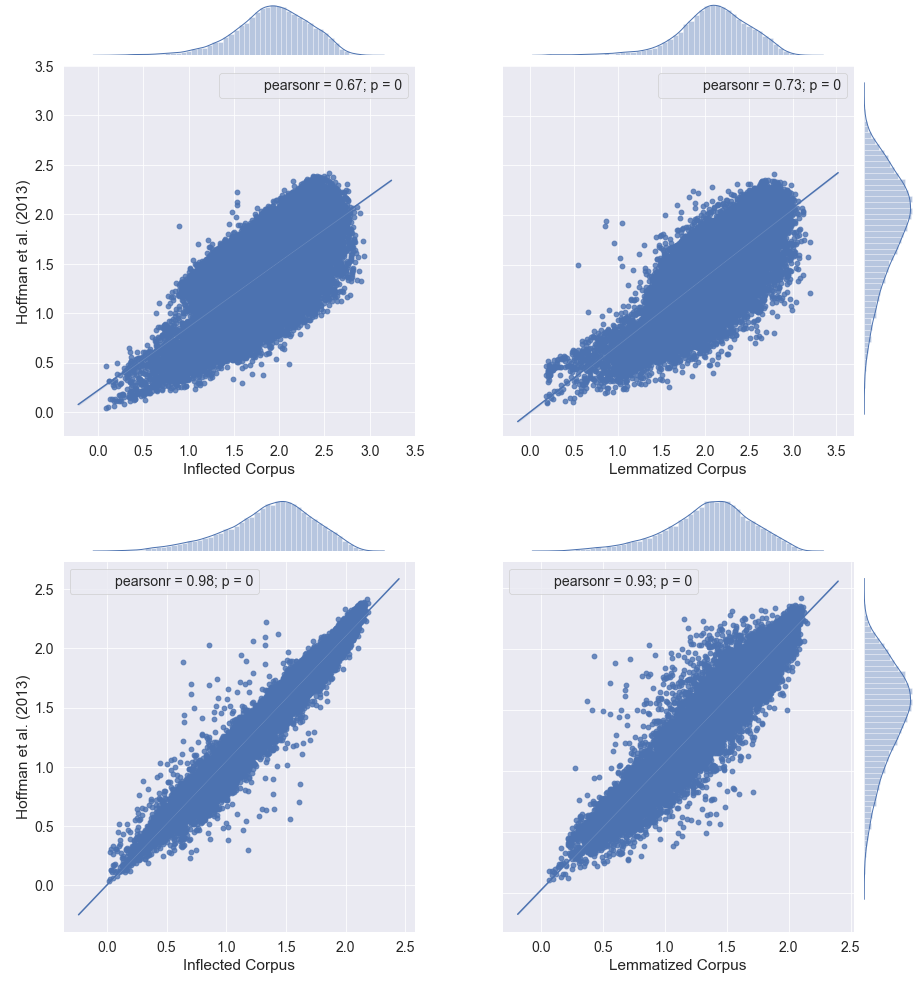

In [104]:
# Figure A
a = sns.jointplot(x='SemD', y='SemD_H13', 
                    data=diversityInfo[(diversityInfo["Preprocessing"]=="C19_P1")&(diversityInfo["LSAvectors"]=="SVsWeighted")],
                    kind="reg", stat_func=stats.pearsonr)
a.set_axis_labels('Inflected Corpus', 'Hoffman et al. (2013)')
a.ax_joint.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
a.ax_joint.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
a.ax_marg_y.set_axis_off()
a.ax_marg_x.set_axis_off()
plt.setp(a.ax_marg_y.patches, color="w", )
plt.setp(a.ax_marg_y.lines, color="w", )

# Figure B
b = sns.jointplot(x='SemD', y='SemD_H13', 
              data=diversityInfo[(diversityInfo["Preprocessing"]=="C19_P2")&(diversityInfo["LSAvectors"]=="SVsWeighted")],
             kind="reg", stat_func=stats.pearsonr)
b.set_axis_labels('Lemmatized Corpus', 'Hoffman et al. (2013)')
b.ax_joint.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
b.ax_joint.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
b.ax_joint.set_yticklabels([])
b.ax_joint.set_ylabel('') 
b.ax_marg_y.set_axis_off()
b.ax_marg_x.set_axis_off()

# Figure C
c = sns.jointplot(x='SemD', y='SemD_H13', 
                    data=diversityInfo[(diversityInfo["Preprocessing"]=="C19_P1")&(diversityInfo["LSAvectors"]=="SVsUnweighted")],
                    kind="reg", stat_func=stats.pearsonr)
c.set_axis_labels('Inflected Corpus', 'Hoffman et al. (2013)')
c.ax_joint.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
c.ax_joint.set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
c.ax_marg_y.set_axis_off()
c.ax_marg_x.set_axis_off()
plt.setp(c.ax_marg_y.patches, color="w", )
plt.setp(c.ax_marg_y.lines, color="w", )

# Figure D
d = sns.jointplot(x='SemD', y='SemD_H13', 
              data=diversityInfo[(diversityInfo["Preprocessing"]=="C19_P2")&(diversityInfo["LSAvectors"]=="SVsUnweighted")],
             kind="reg", stat_func=stats.pearsonr)
d.set_axis_labels('Lemmatized Corpus', 'Hoffman et al. (2013)')
d.ax_joint.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
d.ax_joint.set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
d.ax_joint.set_yticklabels([])
d.ax_joint.set_ylabel('') 
d.ax_marg_y.set_axis_off()
d.ax_marg_x.set_axis_off()

fig = plt.figure(figsize=(13,14))

mg0 = SeabornFig2Grid(a, fig, gs[0])
mg1 = SeabornFig2Grid(b, fig, gs[1])
mg2 = SeabornFig2Grid(d, fig, gs[3])
mg3 = SeabornFig2Grid(c, fig, gs[2])

gs.tight_layout(fig)
#gs.update(top=0.7)

plt.savefig('figures\SemanticDiversityComparison.pdf', format='pdf')
plt.show()